# 3장 사이킷런 알고리즘
## 가우시안 나이브 베이지안, 로지스틱 회귀

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

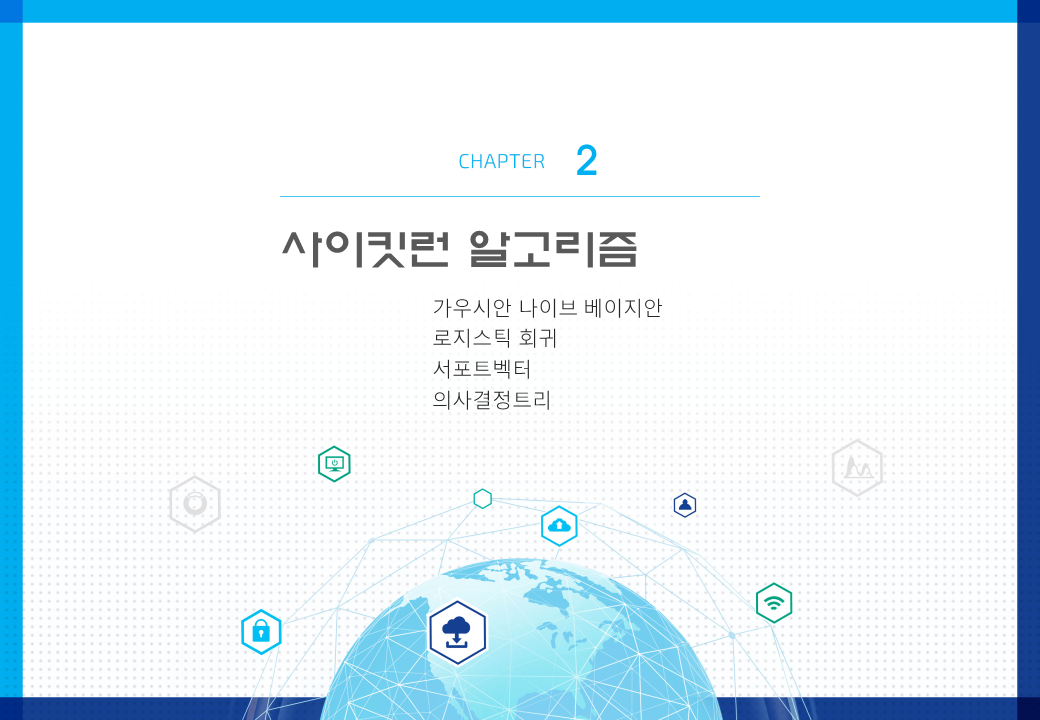

In [2]:
from IPython.display import Image
width = 800; height = 600
Image(filename='../img/슬라이드58.png', width=width, height=height)

##  1. Gausian Naive Bayseain(가우시안 나이브 베이지안 모델)

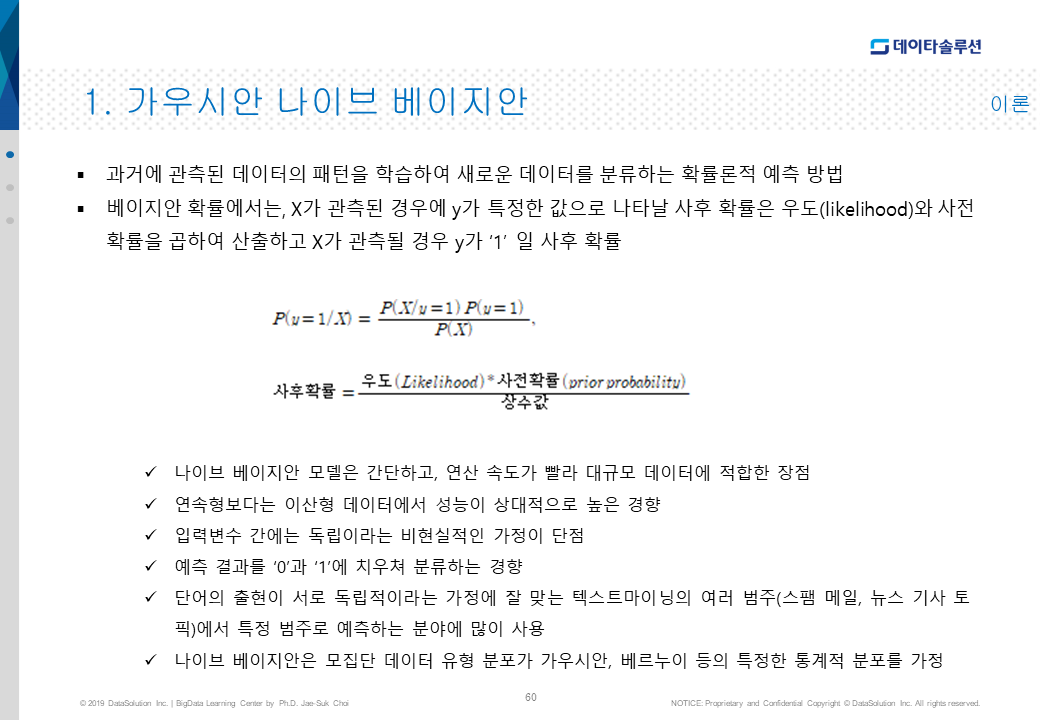

In [3]:
Image(filename='../img/슬라이드60.png', width=width, height=height)

## 데이터 불러오기

In [4]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.head()

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0


((3200, 78), (800, 78))

((3200,), (800,))

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

(array([ 19.,   0.,   4.,   1.,   2.,   1.,   3.,   2.,   6., 762.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

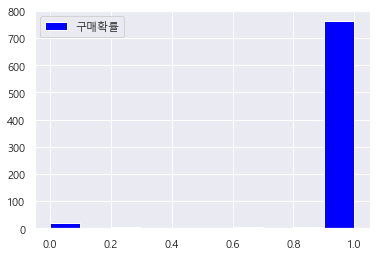

(array([762.,   6.,   2.,   3.,   1.,   2.,   1.,   4.,   0.,  19.]),
 array([3.29476548e-35, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

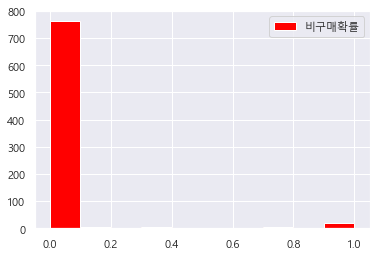

In [6]:
y_predict = model.predict(X_test)
y_probas = model.predict_proba(X_test)
data = pd.DataFrame(y_probas, columns =['비구매확률', '구매확률']).round(2)
data['분류'] = y_predict
plt.hist(y_probas[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_probas[:, 0], color ='red', label='비구매확률'); plt.legend()

              precision    recall  f1-score   support

           0       0.69      0.03      0.07       522
           1       0.35      0.97      0.51       278

    accuracy                           0.36       800
   macro avg       0.52      0.50      0.29       800
weighted avg       0.57      0.36      0.22       800



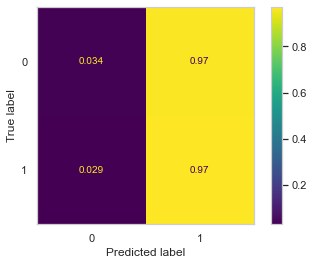

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(model, X_test, y_test, normalize='true')
print(classification_report(y_test, y_predict))

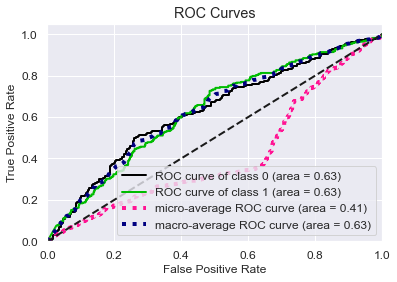

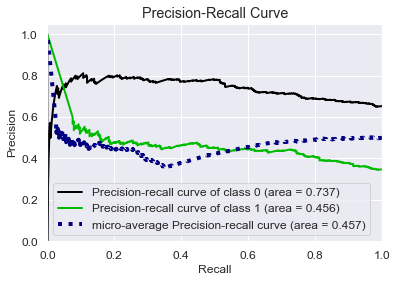

In [9]:
sns.set()
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [10]:
from joblib import dump, load
dump(model, '../output/gnb.joblib')

['../output/gnb.joblib']

### 가우시안 나이즈 베이지안 알고리즘의 이해

https://en.wikipedia.org/wiki/Naive_Bayes_classifier 

In [11]:
df = pd.DataFrame({'성별' : ['남성', '남성', '남성', '남성','여성','여성','여성','여성'],
                  '신장' : [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75], # feet
                  '무게' : [180, 190, 170, 165, 100, 150, 130, 150],  # pounds
                  '발의크기' : [12, 11, 12, 10, 6, 8, 7, 9]})             # inches
data = df.groupby('성별')['신장', '무게', '발의크기'].agg(['mean','var']).reset_index('성별')
df = df.merge(data, on='성별')
df = df.append({'신장':6, '무게':130, '발의크기':8}, ignore_index=True)
df

,성별,신장,무게,발의크기,"(신장, mean)","(신장, var)","(무게, mean)","(무게, var)","(발의크기, mean)","(발의크기, var)"
0,남성,6.00,180.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
1,남성,5.92,190.0,11.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
2,남성,5.58,170.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
3,남성,5.92,165.0,10.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
4,여성,5.00,100.0,6.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
5,여성,5.50,150.0,8.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
6,여성,5.42,130.0,7.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
7,여성,5.75,150.0,9.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
8,NaN,6.00,130.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mu_m, sigma_m = data.iloc[0,1], np.sqrt(data.iloc[0,2])
(mu_m, sigma_m**2)
mu_f, sigma_f = data.iloc[1,1], np.sqrt(data.iloc[1,2])
(mu_f, sigma_f**2)

(5.855, 0.0350333333333333)

(5.4175, 0.09722499999999992)

In [13]:
import scipy.stats
like_m = scipy.stats.norm(mu_m, sigma_m).pdf(6)
print('남성 우도는 {0:.3f}이고, 남성일 사후확률은 {1:.2f}'.format(like_m,0.5*like_m))
like_f = scipy.stats.norm(mu_f, sigma_f).pdf(6)
print('여성 우도는 {0:.3f}이고, 여성일 사후확률은 {1:.2f}'.format(like_f,0.5*like_f))

남성 우도는 1.579이고, 남성일 사후확률은 0.79
여성 우도는 0.223이고, 여성일 사후확률은 0.11


In [14]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

Text(6.0, 1.5788831832641042, '     Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 남성일 가능성(Likelihood)')

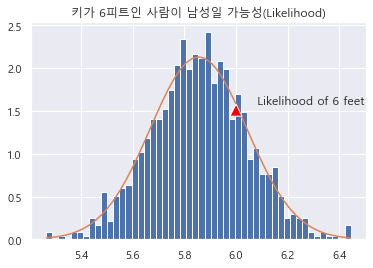

In [15]:
s = np.random.normal(mu_m, sigma_m, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('     Likelihood of 6 feet', xy=(6., like_m), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_m * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_m)**2 / (2*sigma_m**2)))
plt.title('키가 6피트인 사람이 남성일 가능성(Likelihood)')

Text(6.0, 0.2234587268448157, '  Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 여성일 가능성(Likelihood)')

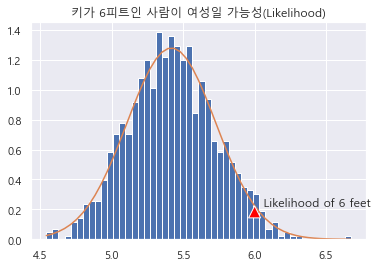

In [16]:
s = np.random.normal(mu_f, sigma_f, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('  Likelihood of 6 feet', xy=(6., like_f), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_f * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_f)**2 / (2*sigma_f**2)))
plt.title('키가 6피트인 사람이 여성일 가능성(Likelihood)')

In [17]:
import math
mh= ((1/math.sqrt(2*math.pi*data.iloc[0,2])) * 
     math.exp(-1*(6 - data.iloc[0,1])**2/(2*data.iloc[0,2])))
mw= ((1/math.sqrt(2*math.pi*data.iloc[0,4])) * 
     math.exp(-1*(130 - data.iloc[0,3])**2/(2*data.iloc[0,4])))
mf=((1/math.sqrt(2*math.pi*data.iloc[0,6])) * 
    math.exp(-1*(8 - data.iloc[0,5])**2/(2*data.iloc[0,6])))
print('남성일 사후확률 {0:.5f}'.format(mh* mw* mf*0.5))

wh= ((1/math.sqrt(2*math.pi*data.iloc[1,2])) * 
     math.exp(-1*(6 - data.iloc[1,1])**2/(2*data.iloc[1,2])))
ww= ((1/math.sqrt(2*math.pi*data.iloc[1,4])) * 
     math.exp(-1*(130 - data.iloc[1,3])**2/(2*data.iloc[1,4])))
wf=((1/math.sqrt(2*math.pi*data.iloc[1,6])) * 
    math.exp(-1*(8 - data.iloc[1,5])**2/(2*data.iloc[1,6])))
print('여성일 사후확률 {0:.5f}'.format(wh* ww* wf*0.5))

남성일 사후확률 0.00000
여성일 사후확률 0.00054


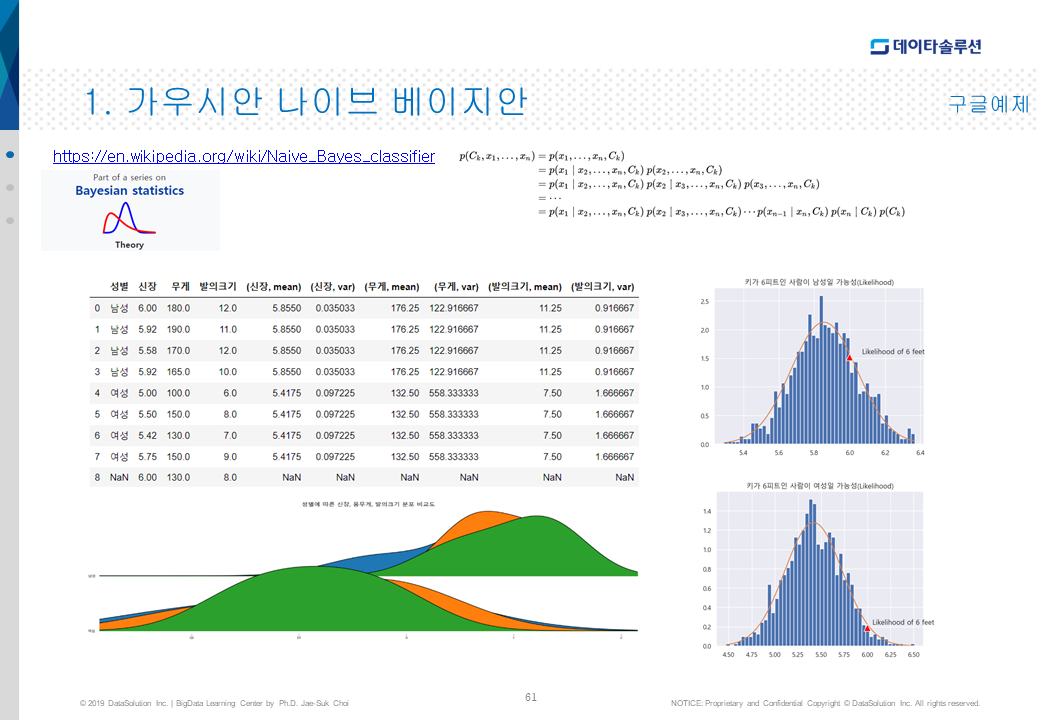

In [18]:
Image(filename='../img/슬라이드61.png', width=width, height=height)

# End

## 2. 로지스틱 회귀 모델

- https://en.wikipedia.org/wiki/Logistic_regression  : 
<div class="alert-info">
### odds, odds ratio, log odds, logit, logistics
</div>

- https://en.wikipedia.org/wiki/Generalized_linear_model : 
<div class="alert-danger">
### Generalized linear model, Link Fuction
</div>

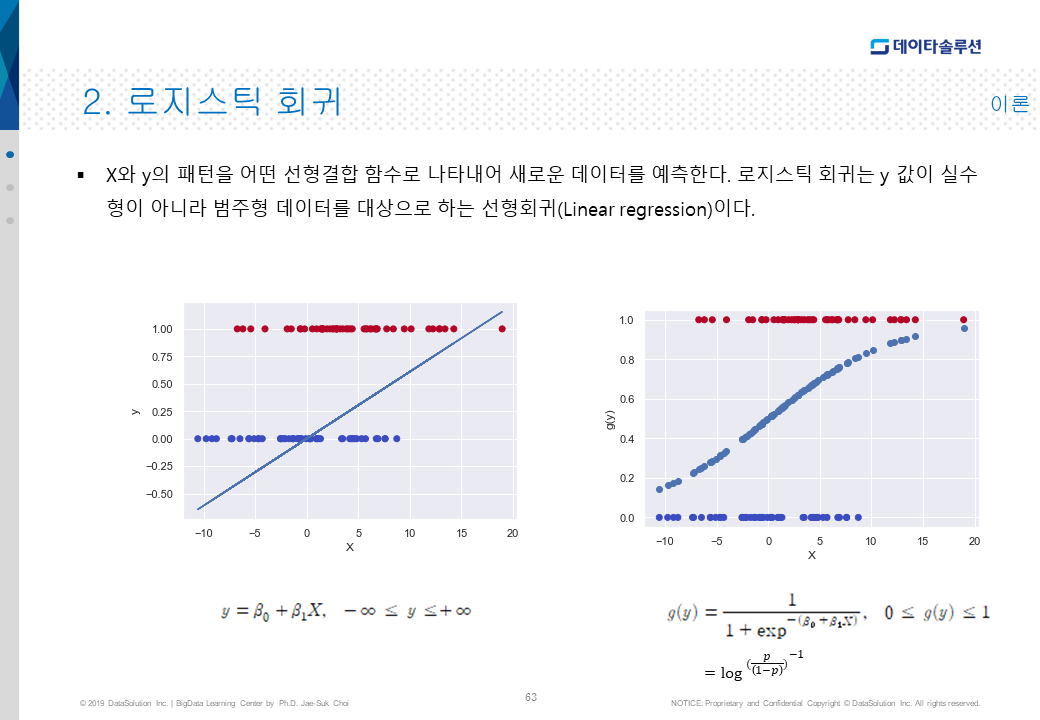

In [19]:
Image(filename='../img/슬라이드63.png', width=width, height=height)

(100,)

(100, 1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

<Figure size 1080x360 with 0 Axes>

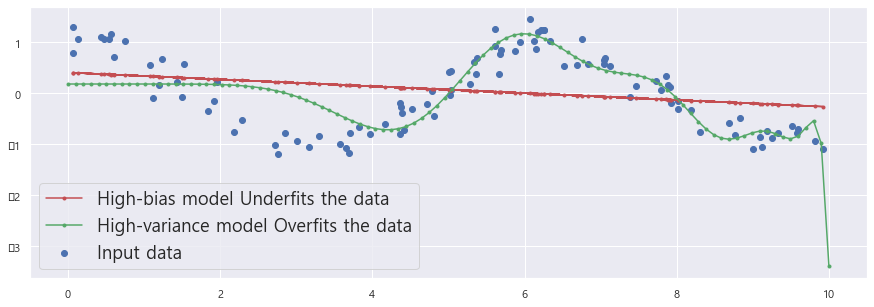

In [20]:
# Lasso와 Ridge
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); X.shape
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis] 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
y_predict = LinearRegression().fit(X,y).predict(X)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit[:,np.newaxis])

plt.figure(figsize=(15, 5));  plt.rc('legend', fontsize=18)
plt.scatter(X, y, label='Input data'); plt.legend()
plt.plot(X, y_predict, 'r.-', label='High-bias model Underfits the data'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='High-variance model Overfits the data'); plt.legend()

실제 값과 예측값의 차이가 예측오류다. 예측오류는 분산(variance)과 편향(bias)으로 구성된다. 
- 분산은 모델의 예측값이 예측값의 평균을 중심으로 얼마나 퍼져 있는지 변동성을 보여주고, 
- 편향은 실제값과 예측값 평균의 차이로, 모델의 정확성을 나타낸다. 

array([-4459.89470807])

array([-0.33203872])

<Figure size 1080x360 with 0 Axes>

(-4.0, 4.0)

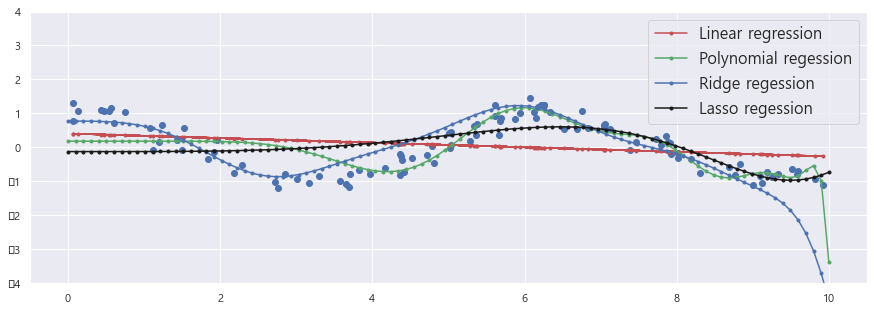

In [21]:
new_data = np.array([[11.00]])
poly_model.predict(new_data)
LinearRegression().fit(X,y).predict(new_data)

from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

plt.figure(figsize=(15, 5)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

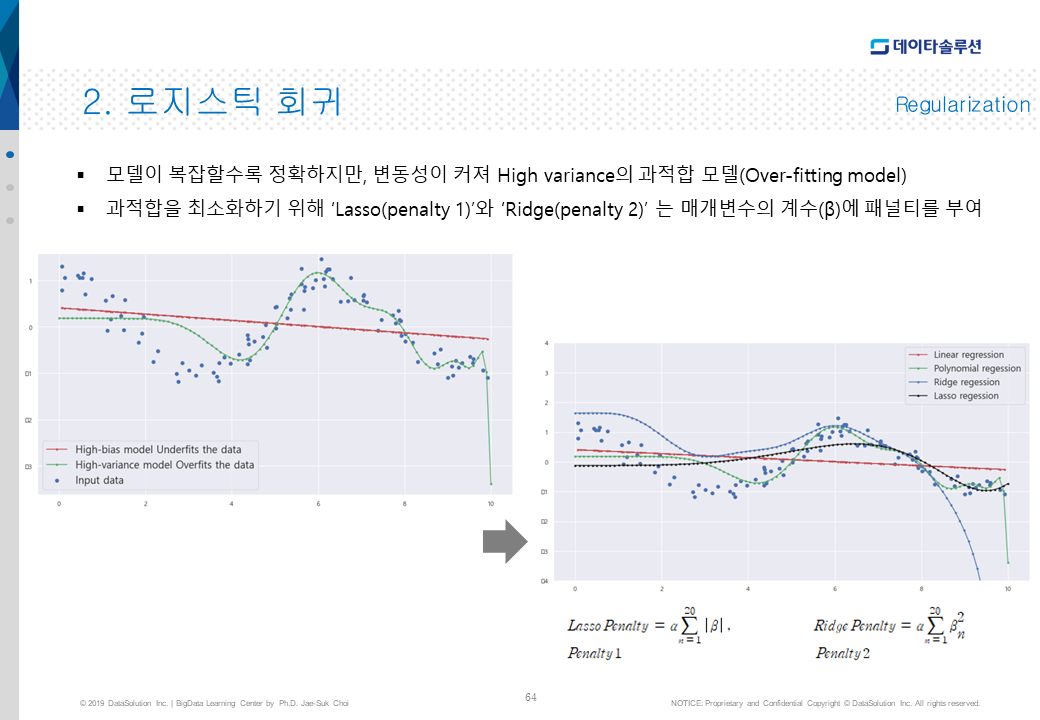

In [22]:
Image(filename='../img/슬라이드64.png', width=width, height=height)

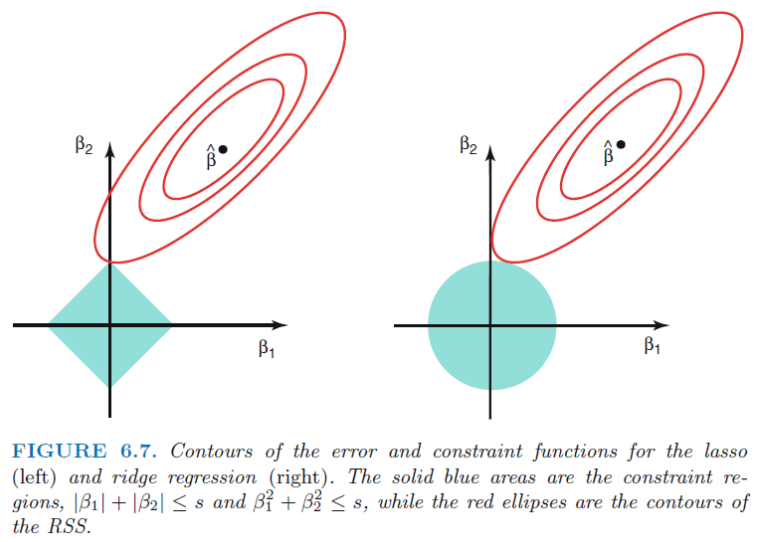

In [23]:
Image(filename='../img/l1_l2.png', width=500, height=400)

## 데이터 불러오기

In [24]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.head()

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0


((3200, 78), (800, 78))

((3200,), (800,))

In [25]:
from sklearn.linear_model import LogisticRegression

np.random.seed(1357)
kf = KFold(n_splits=5)
model = LogisticRegression(random_state=11)
model.get_params().keys()

params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)

print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

optimal train score: 0.587
test score: 0.571
optimal parameter: {'penalty': 'l2', 'C': 1.623776739188721}


In [26]:
model= LogisticRegression(random_state=11, penalty= 'l2', C=1.623776739188721)
model.fit(X_train, y_train)
model.coef_
model.intercept_

LogisticRegression(C=1.623776739188721, random_state=11)

array([[-0.28707754, -0.08682648,  0.15317171, -0.308271  , -0.11366103,
         0.04130046,  0.96631781, -0.91511954, -0.19764243, -0.08999921,
        -0.02330404, -0.12627784, -0.1707124 , -0.0222459 ,  0.38209878,
        -0.32346341, -0.98456416,  0.7109503 , -0.07903598, -0.06566043,
        -0.04868721,  0.03700442,  0.36916457,  0.14273534, -0.23325379,
         0.22120219, -0.05520159, -0.38855768, -0.16018223, -0.07411097,
        -0.35413655,  0.30085891, -0.08633317, -0.1693371 , -0.2423421 ,
         0.03777518,  0.00560429, -0.16316859,  0.32082666, -0.15695999,
         0.12566175,  0.04787742, -0.0903109 ,  0.0989839 ,  0.07526403,
        -0.04480982, -0.14229414,  0.00479648,  0.49599904, -0.02876631,
         0.15124852,  0.23351779, -0.01518314,  0.23980328,  0.1189049 ,
         0.13078962,  0.09090644, -0.15445584,  0.11687852, -0.54419036,
        -0.15199676, -1.03647571,  0.05908135, -0.09370349,  0.46074372,
         0.15706109, -0.0433436 ,  0.15297466,  0.0

array([-1.05842256])

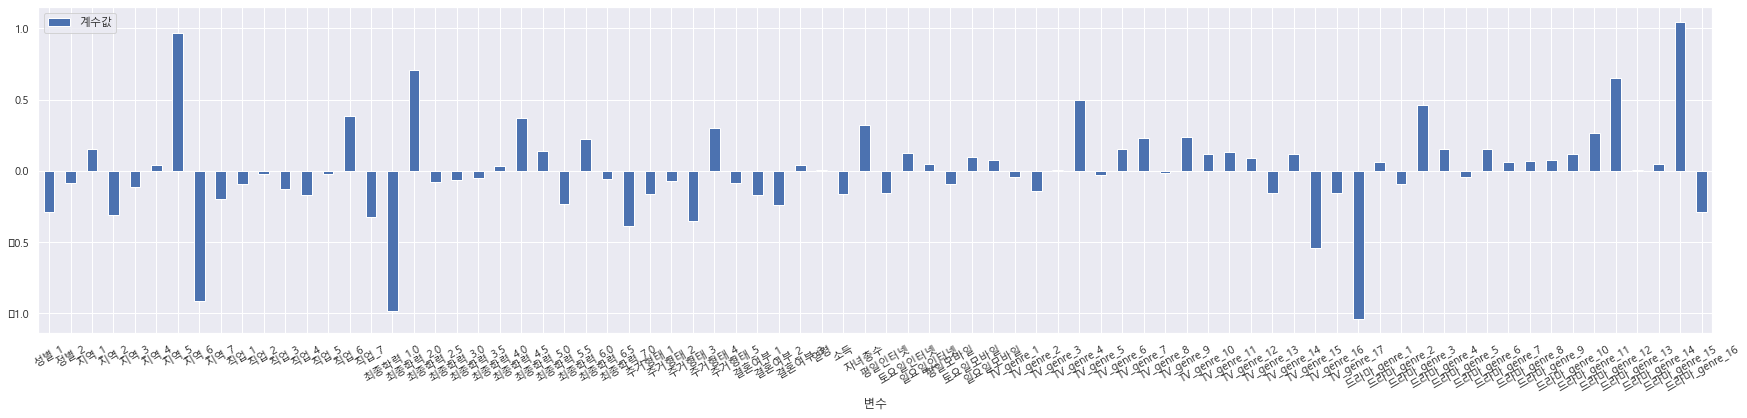

In [27]:
sns.set()
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트/
data = zip(X_train.columns, np.squeeze(model.coef_))
pd.DataFrame(data, columns =['변수', '계수값']).set_index('변수').plot.bar(rot='30', figsize=(30,6))

(array([ 48., 133., 134., 152., 115.,  76.,  59.,  56.,  21.,   6.]),
 array([0.05139976, 0.12980166, 0.20820356, 0.28660547, 0.36500737,
        0.44340928, 0.52181118, 0.60021309, 0.67861499, 0.7570169 ,
        0.8354188 ]),
 <a list of 10 Patch objects>)

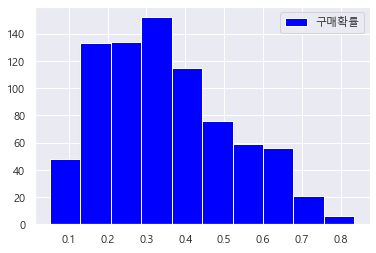

(array([  6.,  21.,  56.,  59.,  76., 115., 152., 134., 133.,  48.]),
 array([0.1645812 , 0.2429831 , 0.32138501, 0.39978691, 0.47818882,
        0.55659072, 0.63499263, 0.71339453, 0.79179644, 0.87019834,
        0.94860024]),
 <a list of 10 Patch objects>)

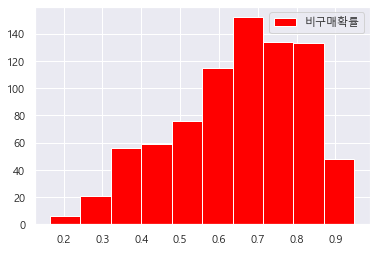

In [28]:
y_predict = model.predict(X_test)
y_probas = model.predict_proba(X_test)
data = pd.DataFrame(y_probas, columns =['비구매확률', '구매확률']).round(2)
data['분류'] = y_predict
plt.hist(y_probas[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_probas[:, 0], color ='red', label='비구매확률'); plt.legend()

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       522
           1       0.52      0.28      0.37       278

    accuracy                           0.66       800
   macro avg       0.60      0.57      0.57       800
weighted avg       0.63      0.66      0.63       800



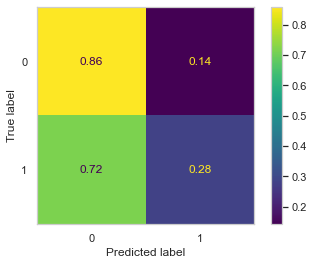

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(grid, X_test, y_test, normalize='true')
print(classification_report(y_test, y_predict))

In [30]:
from joblib import dump, load
dump(model, '../output/lgr.joblib')

['../output/lgr.joblib']

# 손실함수 조정

### 소수범주의 자료의 비중을 로그손실함수에 반영

In [31]:
model = LogisticRegression(random_state=11, class_weight='balanced')

params = {}
gs = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
gs.fit(X_train, y_train)
y_predict = gs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=11),
                   param_distributions={}, scoring='recall_macro')

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       522
           1       0.47      0.61      0.53       278

    accuracy                           0.62       800
   macro avg       0.61      0.62      0.61       800
weighted avg       0.65      0.62      0.63       800



In [32]:
y.value_counts(normalize=True)
major = y.value_counts(normalize=True)[0]
minor = y.value_counts(normalize=True)[1]
major; minor

0    0.65275
1    0.34725
Name: 구매, dtype: float64

0.65275

0.34725

In [33]:
model = LogisticRegression(random_state=11, class_weight={0: minor, 1: major})

params = {}
gs = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')

y_predict = gs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       522
           1       0.47      0.60      0.53       278

    accuracy                           0.62       800
   macro avg       0.61      0.62      0.61       800
weighted avg       0.65      0.62      0.63       800



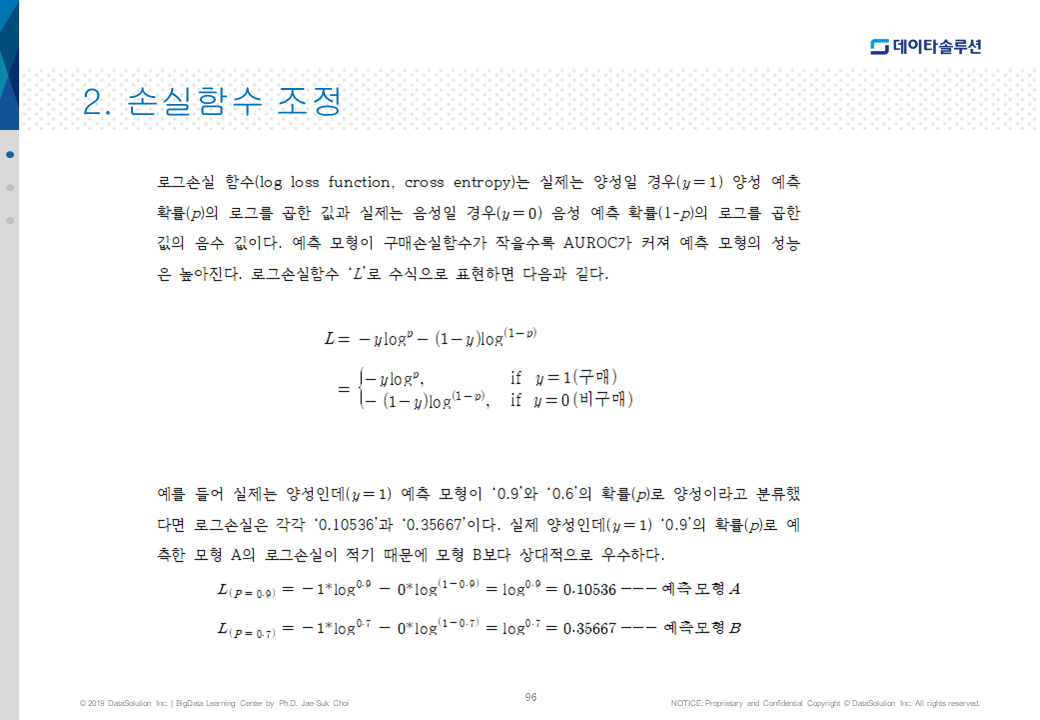

In [34]:
Image(filename='../img/슬라이드96.png', width=width, height=height)

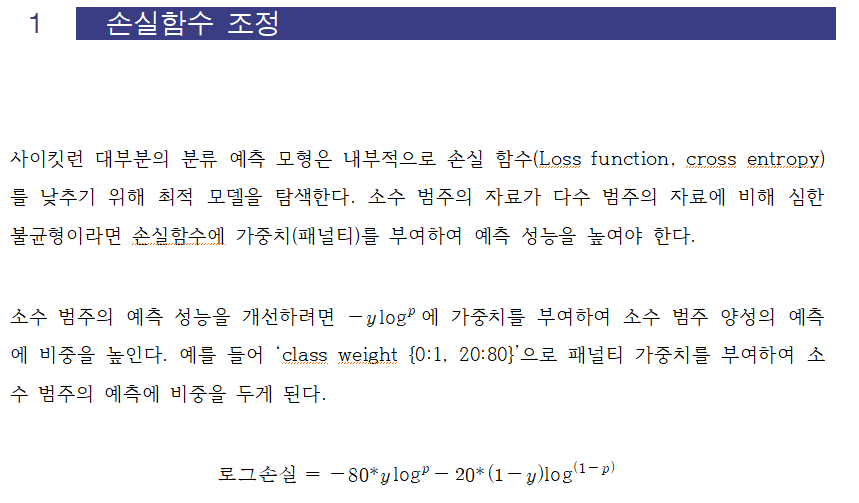

In [35]:
Image(filename='../img/손실함수조정.png', width=width, height=height)

In [36]:
model = LogisticRegression(random_state=11, class_weight={0: 20, 1: 80})

params = {}
gs = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')

y_predict = gs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.26      0.40       522
           1       0.39      0.88      0.54       278

    accuracy                           0.48       800
   macro avg       0.60      0.57      0.47       800
weighted avg       0.67      0.48      0.45       800



In [37]:
model = LogisticRegression(random_state=11, class_weight={0: major, 1: minor})

params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)
y_predict = grid.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(class_weight={0: 0.65275,
                                                              1: 0.34725},
                                                random_state=11),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

              precision    recall  f1-score   support

           0       0.67      0.97      0.79       522
           1       0.63      0.10      0.17       278

    accuracy                           0.67       800
   macro avg       0.65      0.53      0.48       800
weighted avg       0.65      0.67      0.57       800



## 손실함수 default는 동일 비중을 소수와 다수 범주 유형의 비율에 부여

In [38]:
model = LogisticRegression(random_state=11, class_weight={0: 5, 1: 5})

params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)
y_predict = grid.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(class_weight={0: 5, 1: 5},
                                                random_state=11),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

              precision    recall  f1-score   support

           0       0.69      0.85      0.77       522
           1       0.51      0.29      0.37       278

    accuracy                           0.66       800
   macro avg       0.60      0.57      0.57       800
weighted avg       0.63      0.66      0.63       800



## End